In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadr

In [10]:
data = pd.read_csv("Data/Eladio.csv")

In [4]:
data = data[['c.mgg.c', 'n.mgg.c', 'k.mgg.c','p.mgg.c']]
data.rename(columns = {"c.mgg.c": 'c', 'n.mgg.c':'n', 'k.mgg.c':'k', 'p.mgg.c':'p'}, inplace = True)

In [5]:
data

,c,n,k,p
0,454.085143,26.155729,40.462309,1.414793
1,419.199882,20.819969,7.748736,1.352683
2,478.419766,26.957145,19.920343,2.000279
3,433.764745,27.212147,57.525130,2.648611
4,422.825955,23.054792,8.191149,1.533594
5,371.596379,13.504332,4.008443,0.264203
6,401.462566,17.278003,7.437340,1.043848
7,417.502712,19.442423,5.477296,0.677536
8,458.338797,29.518023,7.374620,2.190804
9,428.239679,20.126784,9.713010,1.073532


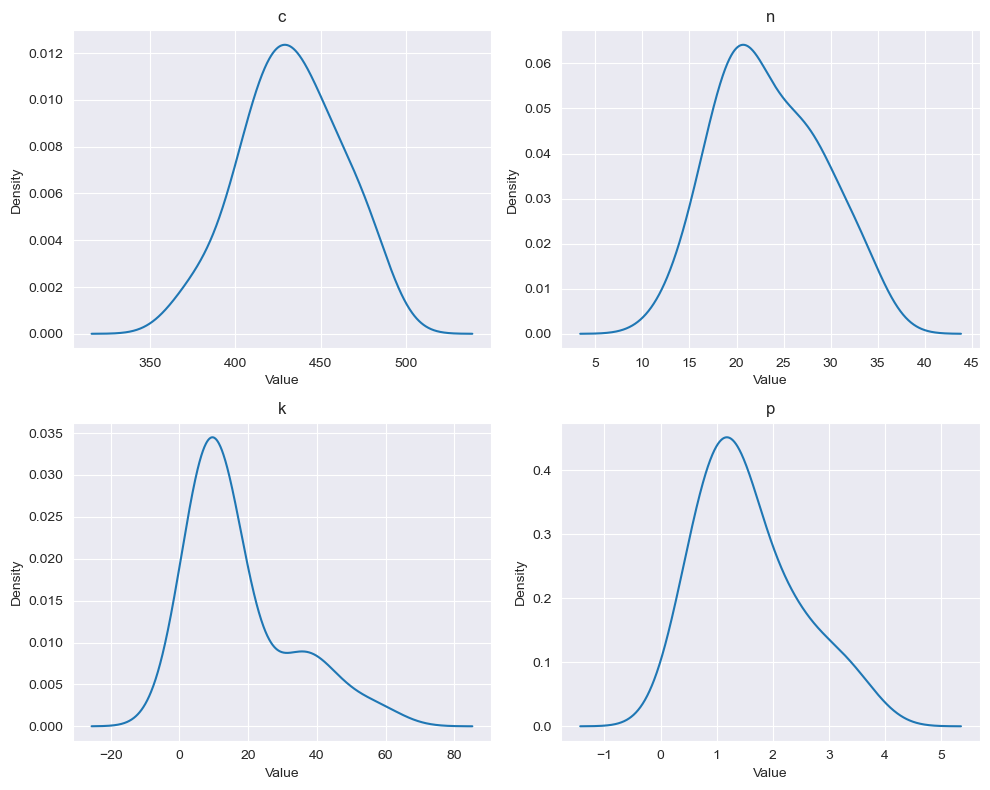

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, data.columns):
    data[col].dropna().plot(kind="kde", ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

In [7]:
stats = data.agg(["mean", "std"])
print(stats)

               c          n          k         p
mean  432.777977  23.432839  17.186794  1.566588
std    28.524313   5.438389  14.665855  0.881621


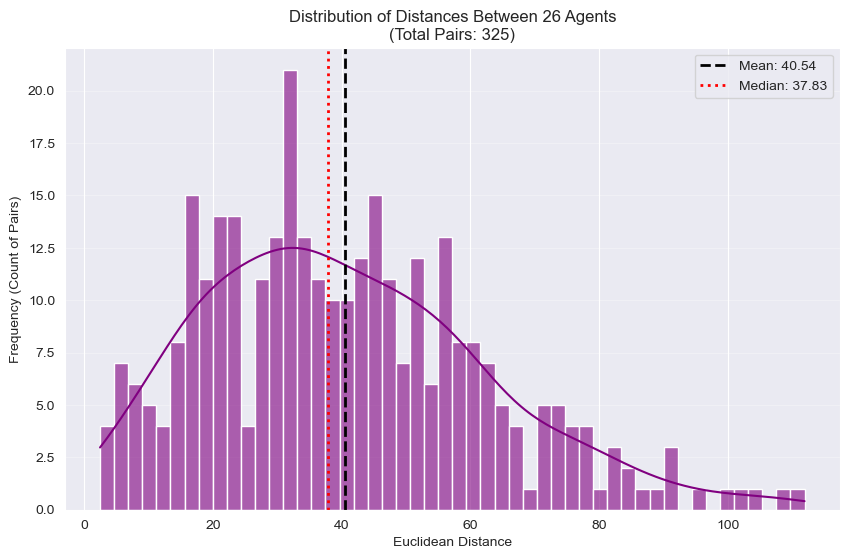

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist

# --- 1. Generate Sample Data (Replace with your actual DataFrame) ---
# Simulating 500 agents with 4 random traits (N, P, K, O)
df = data
# --- 2. Compute Pairwise Distances ---
# pdist computes distances between ALL unique pairs of rows
# It returns a condensed 1D array (saves memory vs a full square matrix)
distances = pdist(df.values, metric='euclidean')

# --- 3. Plot the Distribution ---
plt.figure(figsize=(10, 6))

# Histogram with Kernel Density Estimate (KDE)
sns.histplot(distances, kde=True, bins=50, color='purple', alpha=0.6)

# Add Mean and Median lines
mean_dist = np.mean(distances)
median_dist = np.median(distances)

plt.axvline(mean_dist, color='k', linestyle='--', linewidth=2, label=f'Mean: {mean_dist:.2f}')
plt.axvline(median_dist, color='r', linestyle=':', linewidth=2, label=f'Median: {median_dist:.2f}')

plt.title(f"Distribution of Distances Between {len(df)} Agents\n(Total Pairs: {len(distances):,})")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency (Count of Pairs)")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()